In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
class LinerReg:
    def __init__(self, lr = 1e-4, iters = 20000):
        self.lr = lr
        self.iters = iters

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)
    
    def loss_func(self, x, y, w):
        return np.mean((y - np.dot(x, w)) ** 2)
    
    def fit(self, x, y):
        dist = np.inf
        eps = 1e-4
        X = self.transform_(x)
        
        w = np.zeros(X.shape[1])
        iter = 0
        
        while dist > eps and iter <= self.iters:
            loss = self.loss_func(X, y, w)
            w = w - self.lr * 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y, w))
            iter += 1
        print(iter)
        self.w = w

    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

In [7]:
# Регуляризатор Ridge(L2)
class Ridge:
    def __init__(self, lr = 1e-4, iters = 20000):
        self.lr = lr
        self.iters = iters

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)
    
    def loss_func(self, x, y, w):
        return (np.mean((y - np.dot(x, w)) ** 2) + (self.alpha*sum(w**2)))
    
    def fit(self, x, y, alpha):
        self.alpha = alpha
        dist = np.inf
        eps = 1e-4
        X = self.transform_(x)
        
        w = np.zeros(X.shape[1])
        iter = 0
        
        while dist > eps and iter <= self.iters:
            loss = self.loss_func(X, y, w)
            w = w - self.lr * (2 * ((np.dot(X.T, np.dot(X, w) - y)) / X.shape[0]) + (self.alpha * sum(2 * w)))
            dist = np.abs(loss - self.loss_func(X, y, w))
            iter += 1
        print(iter)
        self.w = w

    
    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

In [8]:
# Метрики качества

def R2(y_test, y_pred):
    numerator = ((y_test - y_pred) ** 2).sum()
    denominator = (
        (y_test - np.average(y_test, axis=0)) ** 2
        ).sum()
    return 1 - (numerator / denominator)
    
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/y_test))
    
def RMSE(y_test, y_pred):
    return sqrt(MSE(y_test, y_pred))
    
def MSE(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)
    
def MAE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)))

In [9]:
#Тест класса
# data2=pd.DataFrame({
#    'Exp':[2,2.2, 2.8, 4, 7, 8, 11, 12, 21, 25, 28, 34, 40, 43, 50, 55.5, 60],
#    'Salary': [7, 8, 11, 15, 22, 29, 37 ,45.7, 49, 52, 53, 60, 71, 73, 81, 89, 95]
# })
# y = data2['Salary']
# X = data2['Exp'].values.reshape(-1,1)

X, y = make_regression(n_samples=230, n_features=1, noise=30, random_state=42)

# df = pd.read_csv('../data/regression/moldova_cars_task_preprocessed.csv', index_col=0)
# y = df["Price(euro)"]
# X = df.drop(["Price(euro)"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((161, 1), (161,), (69, 1), (69,))

In [10]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')
print(f'MAPE: {MAPE(y_test, y_pred)}')
print(f'R^2: {R2(y_test, y_pred)}')

MAE: 57.713607247597324
MSE: 4740.652508501606
RMSE: 68.85239653419194
MAPE: 0.9999999999957445
R^2: -0.015044773679959267


In [29]:
lr = LinerReg()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')
print(f'MAPE: {MAPE(y_test, y_pred)}')
print(f'R^2: {R2(y_test, y_pred)}')

20001
MAE: 26.803820241540713
MSE: 1088.0436488494215
RMSE: 32.98550664836636
MAPE: 0.9185787309197286
R^2: 0.7777495438434001


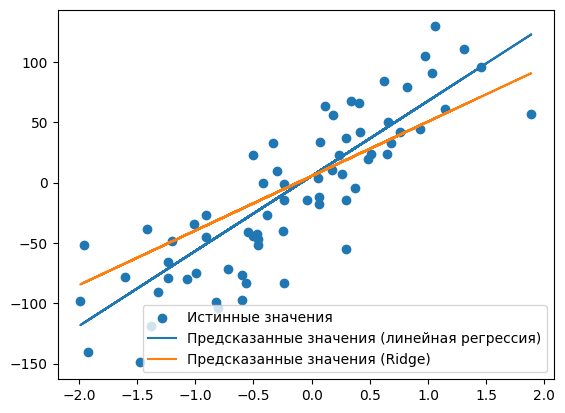

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, label='Истинные значения');
plt.plot(X_test, lr.predict(X_test), label='Предсказанные значения (линейная регрессия)');
plt.plot(X_test, ridge.predict(X_test), label='Предсказанные значения (Ridge)');
plt.legend();